In [1]:
from file_reader import df_reader_msr

from dispatcher import DispatcherTotalHeatNoCountMiss
from dispatcher import DispatcherTotalHeatCountMiss

from dispatcher import DispatcherHeatNoCountMissDecayRate
from dispatcher import DispatcherHeatNoCountMissMovingWindow
from dispatcher import DispatcherHeatNoCountMissMovingWindowDecayRate

from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trace_df = df_reader_msr('C:/Users/28347/Documents/CDN/trace/MSR-Cambridge2/CAM-01-SRV-lvm1.csv')

In [6]:
def make_requests():
    for row in trace_df.itertuples():
        yield getattr(row, 'Offset'), getattr(row, 'Size')

In [4]:
FILE_NUM = len(trace_df['Offset'].value_counts())
CACHE_NUMBER = 4
print(FILE_NUM)
print(CACHE_NUMBER)

dispatcher1_small_server_hit_byte_ratio = []
dispatcher2_small_server_hit_byte_ratio = []
big_server_hit_byte_ratio = []

heat1_1 = []
heat1_2 = []
heat1_3 = []
heat1_4 = []
heat2_1 = []
heat2_2 = []
heat2_3 = []
heat2_4 = []

hit_ratio1 = []
hit_ratio2 = []
hit_ratio_big = []

small_hit_ratio1_1 = []
small_hit_ratio1_2 = []
small_hit_ratio1_3 = []
small_hit_ratio1_4 = []

small_hit_ratio2_1 = []
small_hit_ratio2_2 = []
small_hit_ratio2_3 = []
small_hit_ratio2_4 = []

time_array = []


small_cache_count_hit_ratio = []
small_cache_byte_hit_ratio = []

13966057
4


In [7]:
cache_size = 16384000000
dispatcher = DispatcherHeatNoCountMissDecayRate(trace_df, cache_size, CACHE_NUMBER, 0.9999, False)
time = 0
for fid, size in tqdm(make_requests()):
    dispatcher.handle_requests(fid, size)
    time += 1
    if time % 100 == 0:
        time_array.append(time)
        
        heat1_1.append(dispatcher.small_caches_heat[0])
        heat1_2.append(dispatcher.small_caches_heat[1])
        heat1_3.append(dispatcher.small_caches_heat[2])
        heat1_4.append(dispatcher.small_caches_heat[3])
        
        hit_ratio = dispatcher.small_caches[0].byte_hit_rate()
        small_hit_ratio1_1.append(hit_ratio)
        hit_ratio = dispatcher.small_caches[1].byte_hit_rate()       
        small_hit_ratio1_2.append(hit_ratio)
        hit_ratio = dispatcher.small_caches[2].byte_hit_rate()
        small_hit_ratio1_3.append(hit_ratio)
        hit_ratio = dispatcher.small_caches[3].byte_hit_rate()
        small_hit_ratio1_4.append(hit_ratio)        
        
        hit_ratio1.append(sum([i.hit_byte for i in dispatcher.small_caches]) / (dispatcher.big_cache.hit_byte + dispatcher.big_cache.miss_byte))
        hit_ratio_big.append(dispatcher.big_cache.hit_byte / (dispatcher.big_cache.hit_byte + dispatcher.big_cache.miss_byte))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

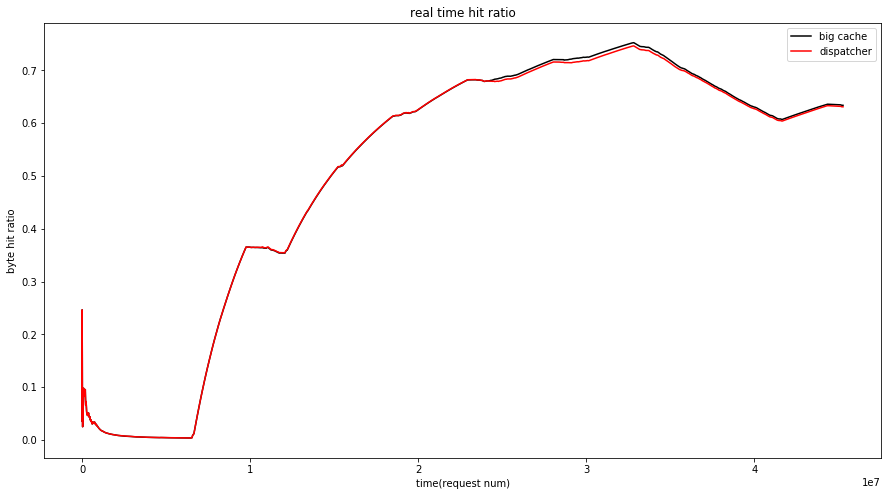

In [8]:
# 查看实时命中率
plt.figure(figsize=(15,8))
plt.plot(time_array, hit_ratio_big, color='black', label='big cache')
plt.plot(time_array, hit_ratio1, color='red', label='dispatcher')
plt.xlabel("time(request num)")
plt.ylabel("byte hit ratio")
plt.title('real time hit ratio')
plt.legend()
plt.show()

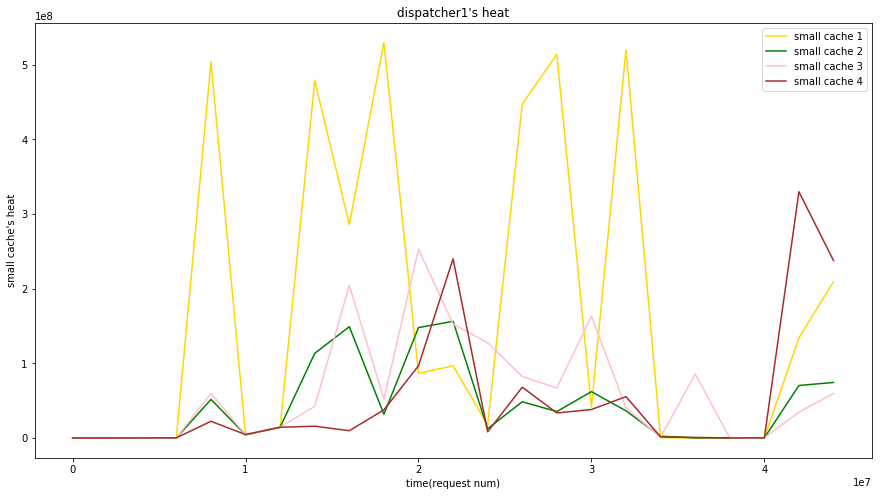

In [13]:
colors = ['gold', 'green', 'pink', 'brown']

# dispatcher1中小cache热度实时变化情况
plt.figure(figsize=(15,8))

plt.plot(time_array[::20000], heat1_1[::20000], color=colors[0], label='small cache 1')
plt.plot(time_array[::20000], heat1_2[::20000], color=colors[1], label='small cache 2')
plt.plot(time_array[::20000], heat1_3[::20000], color=colors[2], label='small cache 3')
plt.plot(time_array[::20000], heat1_4[::20000], color=colors[3], label='small cache 4')

plt.xlabel("time(request num)")
plt.ylabel("small cache's heat")
plt.title("dispatcher1's heat")
plt.legend()
plt.show()